In [2]:
#1.kutuphaneler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#veri yukleme

veriler = pd.read_csv('veriler/veriler.csv')
x = veriler.iloc[:,1:4].values # Bağımsız değişkenler, boy, kilo ve yaş
y = veriler.iloc[:,4:].values # bağmlı değişken, cinsiyet

In [3]:
veriler

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [5]:
# verilerin eğitim ve test için bölünmesi

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [7]:
# verilerin ölçeklenmesi

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test) 

In [8]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state = 0)

logr.fit(X_train, y_train) # X_train verisini kullanarak y_train verisini öğren dedik.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_pred = logr.predict(X_test) # eğitilmiş metoda tahmin uyguluyoruz.
print(y_pred)
print(y_test)

['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']
[['k']
 ['k']
 ['k']
 ['k']
 ['e']
 ['k']
 ['k']
 ['k']]


# Confusion Matrix (Karmaşıklık Matrisi)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)
cm

array([[0, 6],
       [1, 1]], dtype=int64)

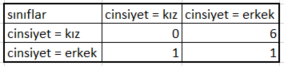